# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aria Riski Ramadhan
- **Email:** ariariskiramadhan@gmail.com
- **ID Dicoding:** sadpablo777

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda berdasarkan musim dalam satu tahun?
- Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("/content/drive/MyDrive/Submission Analisis Data/day.csv")
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
328,329,2011-11-25,4,0,11,0,5,1,1,0.375000,0.380671,0.643750,0.098896,1095,1697,2792
557,558,2012-07-11,3,1,7,0,3,1,1,0.716667,0.650271,0.633333,0.151733,975,6289,7264
242,243,2011-08-31,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688,4370,5058
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
571,572,2012-07-25,3,1,7,0,3,1,1,0.724167,0.654054,0.450000,0.164800,1383,6790,8173
585,586,2012-08-08,3,1,8,0,3,1,2,0.750000,0.707717,0.672917,0.110700,1263,6271,7534
627,628,2012-09-19,3,1,9,0,3,1,1,0.552500,0.540404,0.536667,0.215175,788,6803,7591
656,657,2012-10-18,4,1,10,0,4,1,2,0.522500,0.512625,0.728333,0.236937,1008,6501,7509
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


In [4]:
hours_df = pd.read_csv("/content/drive/MyDrive/Submission Analisis Data/hour.csv")
hours_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12542,12543,2012-06-11,2,1,6,19,0,1,1,2,0.76,0.6818,0.48,0.3284,89,507,596
12150,12151,2012-05-26,2,1,5,11,0,6,0,1,0.70,0.6667,0.74,0.1940,208,312,520
16399,16400,2012-11-21,4,1,11,1,0,3,1,1,0.32,0.3333,0.81,0.1045,1,13,14
13688,13689,2012-07-29,3,1,7,13,0,0,0,1,0.80,0.7424,0.49,0.2239,181,302,483
15386,15387,2012-10-08,4,1,10,7,1,1,0,2,0.34,0.3333,0.76,0.1642,3,151,154
6142,6143,2011-09-18,3,0,9,12,0,0,0,1,0.54,0.5152,0.64,0.1343,135,229,364
12463,12464,2012-06-08,2,1,6,12,0,5,1,1,0.72,0.6515,0.39,0.3284,89,280,369
5974,5975,2011-09-11,3,0,9,11,0,0,0,1,0.70,0.6515,0.65,0.0000,144,258,402
9521,9522,2012-02-06,1,1,2,16,0,1,1,1,0.40,0.4091,0.43,0.2537,13,215,228
15127,15128,2012-09-27,4,1,9,12,0,4,1,2,0.74,0.6667,0.48,0.1343,63,272,335


### Assessing Data

### **Dataframe `day_df`**

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print(f"Jumlah data null di setiap kolomnya : \n{day_df.isnull().sum()}\n")
print(f"Jumlah data terduplikat di setiap kolomnya :", day_df.duplicated().sum())

Jumlah data null di setiap kolomnya : 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data terduplikat di setiap kolomnya : 0


### **Dataframe `hours_df`**

In [8]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
print(f"Jumlah data null di setiap kolomnya : \n{hours_df.isnull().sum()}\n")
print(f"Jumlah data terduplikat di setiap kolomnya :", hours_df.duplicated().sum())

Jumlah data null di setiap kolomnya : 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data terduplikat di setiap kolomnya : 0


**Insight:**
- Tidak ada data yang bernilai null dan tidak ada data yang terduplikat di `day_df`
- Tidak ada data yang bernilai null dan tidak ada data yang terduplikat di `hours_df`

### Cleaning Data

**Mengubah tipedata pada kolom dteday ke datetime pada `day_df`**

In [11]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

**Mengubah tipedata pada kolom dteday ke datetime pada `hours_df`**

In [12]:
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"])

**Membuat variable untuk drop column dan mapping**

In [13]:
day_df["season"] = day_df["season"].astype("category")

In [14]:
#Mapping
season_map = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter",
}

year_map = {
    0: 2011,
    1: 2012,
}

month_map = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}


weather_map = {
    1: "Clear/Cloudy",
    2: "Mist/Overcast",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow",
}


day_df["season"] = day_df["season"].map(season_map)
day_df["yr"] = day_df["yr"].map(year_map)
day_df["mnth"] = day_df["mnth"].map(month_map)
day_df["weathersit"] = day_df["weathersit"].map(weather_map)

day_df.sample(10)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
123,124,2011-05-04,Summer,2011,May,0,3,1,Mist/Overcast,0.414167,0.404650,0.737083,0.328996,255,2378,2633
286,287,2011-10-14,Winter,2011,Oct,0,5,1,Mist/Overcast,0.550833,0.529675,0.716250,0.223883,529,3115,3644
488,489,2012-05-03,Summer,2012,May,0,4,1,Mist/Overcast,0.560000,0.537242,0.768333,0.133696,764,5657,6421
45,46,2011-02-15,Spring,2011,Feb,0,2,1,Clear/Cloudy,0.266087,0.254274,0.314348,0.291374,140,1675,1815
14,15,2011-01-15,Spring,2011,Jan,0,6,0,Mist/Overcast,0.233333,0.248112,0.498750,0.157963,222,1026,1248
161,162,2011-06-11,Summer,2011,Jun,0,6,0,Clear/Cloudy,0.725000,0.678038,0.654583,0.154850,1729,3237,4966
703,704,2012-12-04,Winter,2012,Dec,0,2,1,Clear/Cloudy,0.475833,0.469054,0.733750,0.174129,551,6055,6606
514,515,2012-05-29,Summer,2012,May,0,2,1,Clear/Cloudy,0.722500,0.672992,0.684583,0.295400,880,4863,5743
248,249,2011-09-06,Fall,2011,Sep,0,2,1,Light Rain/Snow,0.540000,0.515200,0.886957,0.343943,204,2506,2710
144,145,2011-05-25,Summer,2011,May,0,3,1,Clear/Cloudy,0.660833,0.615542,0.696250,0.154233,740,4238,4978


**Mengubah nama kolom dan typedata**





In [15]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "cnt": "total_user",
}, inplace=True)
day_df.head()


# Mengubah tipe data kolom ke datetime
day_df["date"] = pd.to_datetime(day_df["date"])

# Mengubah tipe data kategori ke category (lebih efisien daripada object)
categorical_columns = ["year", "month", "weekday", "holiday", "workingday", "weather"]
for col in categorical_columns:
    day_df[col] = day_df[col].astype("category")

# Cek hasil perubahan tipe data
print(day_df.dtypes)

instant                int64
date          datetime64[ns]
season              category
year                category
month               category
holiday             category
weekday             category
workingday          category
weather             category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
total_user             int64
dtype: object


**Menghapus kolom yang tidak digunakan**

In [16]:
columns_to_drop = ["instant","temp","atemp","hum","windspeed","casual","registered"]
day_df.drop(columns=columns_to_drop, inplace=True)
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather,total_user
0,2011-01-01,Spring,2011,Jan,0,6,0,Mist/Overcast,985
1,2011-01-02,Spring,2011,Jan,0,0,0,Mist/Overcast,801
2,2011-01-03,Spring,2011,Jan,0,1,1,Clear/Cloudy,1349
3,2011-01-04,Spring,2011,Jan,0,2,1,Clear/Cloudy,1562
4,2011-01-05,Spring,2011,Jan,0,3,1,Clear/Cloudy,1600


In [17]:
print(day_df.columns)

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'total_user'],
      dtype='object')


**Insight:**
- Kolom di day_df sudah disesuaikan tipedata nya
- Nama kolom di day_df sudah di ubah namanya agar lebih mudah dipahami dan menghapus beberapa kolom yang tidak digunakan

## Exploratory Data Analysis (EDA)

### Explore ...

#### **Jumlah rental sepeda di setiap musim pertahunnya**

In [18]:
rental_permusim = day_df.groupby(["year", "season"], observed=False).agg({
    "total_user": ["sum", "max", "min"]
})

# Merapikan nama kolom
rental_permusim.columns = rental_permusim.columns.droplevel()


# Menampilkan hasil
print(rental_permusim)


                sum   max   min
year season                    
2011 Spring  150000  3239   431
     Summer  347316  5805   795
     Fall    419650  6043  1115
     Winter  326137  5511   627
2012 Spring  321348  7836   441
     Summer  571273  8362  1027
     Fall    641479  8714  4073
     Winter  515476  8555    22


####**Jumlah penyewaan sepeda permusim**

In [19]:
monthly_trend = day_df.groupby(["season", "month"], observed=False)["total_user"].sum().reset_index()
pivot_table = monthly_trend.pivot(index="month", columns="season", values="total_user")

# Sort descending berdasarkan total nilai dari semua season
pivot_table_sorted = pivot_table.sort_values(by=pivot_table.columns.tolist(), ascending=False)


print(pivot_table_sorted)

season  Spring  Summer    Fall  Winter
month                                 
Feb     151352       0       0       0
Mar     142065   86855       0       0
Jan     134933       0       0       0
Dec      42998       0       0  168038
May          0  331686       0       0
Apr          0  269094       0       0
Jun          0  230954  115388       0
Aug          0       0  351194       0
Jul          0       0  344948       0
Sep          0       0  249599   96392
Oct          0       0       0  322352
Nov          0       0       0  254831


#### **Persentase jumlah penyewaan sepeda permusim**

In [20]:
persentase_permusim = (
    day_df.groupby("season", observed=False)["total_user"].sum()
    / day_df["total_user"].sum()
) * 100

# Menampilkan hasil
print(persentase_permusim)

season
Spring    14.315030
Summer    27.897921
Fall      32.226919
Winter    25.560129
Name: total_user, dtype: float64


#### **Rata-rata penyewaan sepeda di setiap kondisi cuaca**

In [21]:
mean_penyewaanSepeda_perCuaca = day_df.groupby("weather", observed=False).agg(
    total_rentals_mean=("total_user", "mean"),
    total_rentals_median=("total_user", "median"),
    total_rentals_std=("total_user", "std")
).reset_index()

print(mean_penyewaanSepeda_perCuaca)

           weather  total_rentals_mean  total_rentals_median  \
0     Clear/Cloudy         4876.786177                4844.0   
1  Light Rain/Snow         1803.285714                1817.0   
2    Mist/Overcast         4035.862348                4040.0   

   total_rentals_std  
0        1879.483989  
1        1240.284449  
2        1809.109918  


#### **Korelasi antara kondisi cuaca dan jumlah penyewaan sepeda**

In [22]:
weather_corr = day_df[["total_user"]].copy()
weather_corr["weather"] = day_df["weather"].cat.codes  # Konversi kategori ke angka

correlation_matrix = weather_corr.corr()
print(correlation_matrix)

            total_user   weather
total_user    1.000000 -0.216577
weather      -0.216577  1.000000


**Insight:**
- Terjadi kenaikan tren dari 2011 ke 2012 di setiap musim
- Fall Season adalah musim dengan jumlah rental sepeda tertinggi, sedangkan Spring Season memiliki jumlah rental terendah.
- Cuaca cerah atau berawan memiliki jumlah rental sepeda tertinggi dibandingkan cuaca lainnya.
- Summer Season juga memiliki jumlah rental sepeda yang tinggi, terutama di bulan Mei, Juni, dan Juli.
- Penyewaan sepeda tetap berlangsung di musim dingin meskipun jumlahnya lebih rendah dibandingkan musim lainnya
- Terdapat korelasi negatif (-0.216) antara kondisi cuaca dan jumlah penyewaan sepeda, artinya semakin buruk cuaca, semakin rendah jumlah penyewaan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda berdasarkan musim dalam satu tahun?

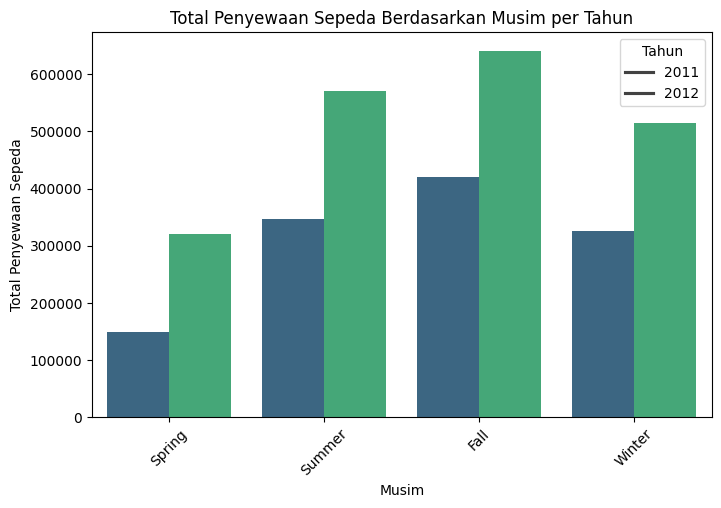

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregasi total penyewaan per musim dan tahun
seasonal_rentals = day_df.groupby(["year", "season"], observed=False)["total_user"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="total_user", hue="year", data=seasonal_rentals, palette="viridis")

# Customisasi
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim per Tahun")
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.xticks(rotation=45)
plt.show()


<ipython-input-73-a0a01de704b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="total_user", data=day_df, palette="coolwarm")


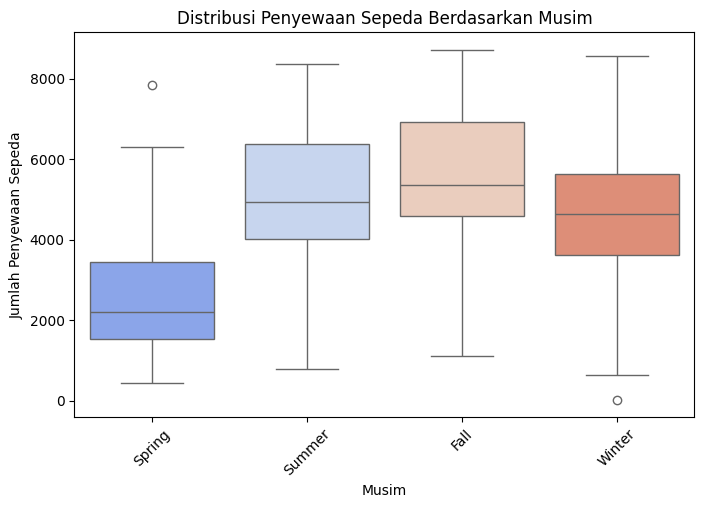

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="season", y="total_user", data=day_df, palette="coolwarm")

# Customisasi
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xticks(rotation=45)
plt.show()


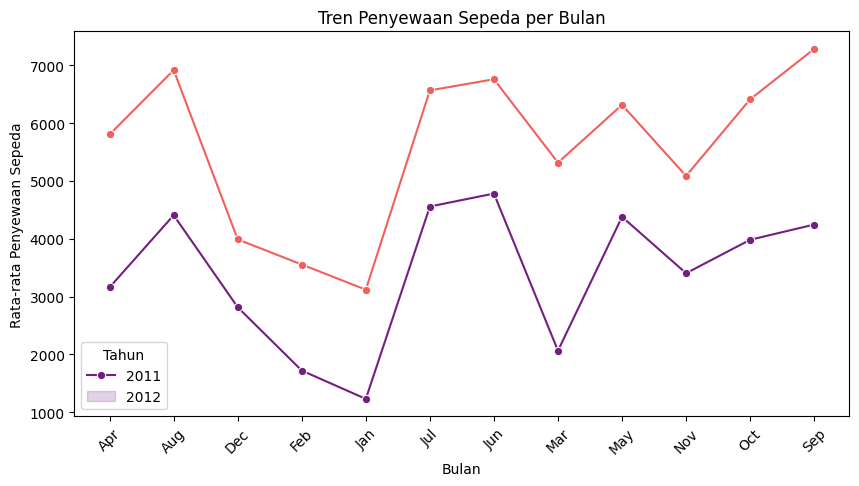

In [ ]:
monthly_trend = day_df.groupby(["year", "month"], observed=False)["total_user"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x="month", y="total_user", hue="year", data=monthly_trend, marker="o", palette="magma")

# Customisasi
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.xticks(rotation=45)
plt.show()




*   Fall Season memiliki jumlah penyewaan sepeda tertinggi, menunjukkan bahwa cuaca saat musim ini sangat mendukung aktivitas bersepeda.
*   Spring Season memiliki jumlah penyewaan sepeda terendah, kemungkinan karena cuaca yang masih tidak stabil dengan curah hujan lebih tinggi.
* Winter Season memiliki jumlah penyewaan yang cukup besar meskipun lebih rendah dibandingkan musim lainnya, menunjukkan bahwa masih ada pengguna setia meskipun suhu lebih rendah.
* Secara keseluruhan, tren penyewaan sepeda meningkat dari tahun ke tahun di semua musim, yang menandakan adanya peningkatan minat dalam bersepeda.



### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda?

<ipython-input-75-98aa643c30a5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather", y="total_user", data=weather_rental_mean, palette="coolwarm")


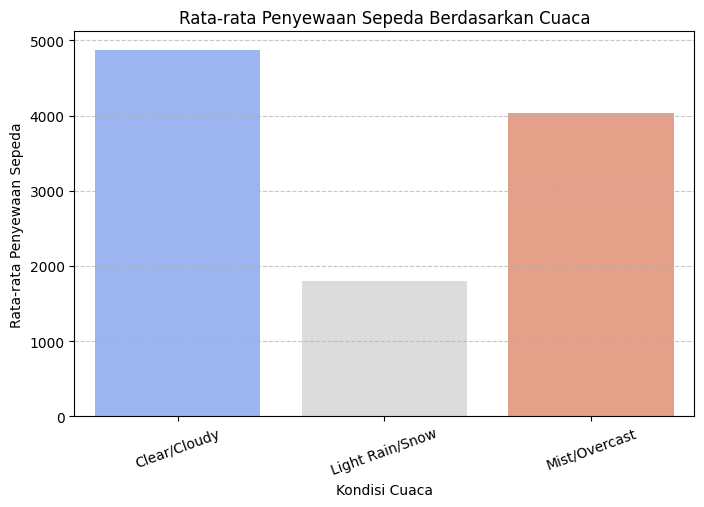

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung rata-rata penyewaan berdasarkan cuaca
weather_rental_mean = day_df.groupby("weather", observed=False)["total_user"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x="weather", y="total_user", data=weather_rental_mean, palette="coolwarm")

plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cuaca")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


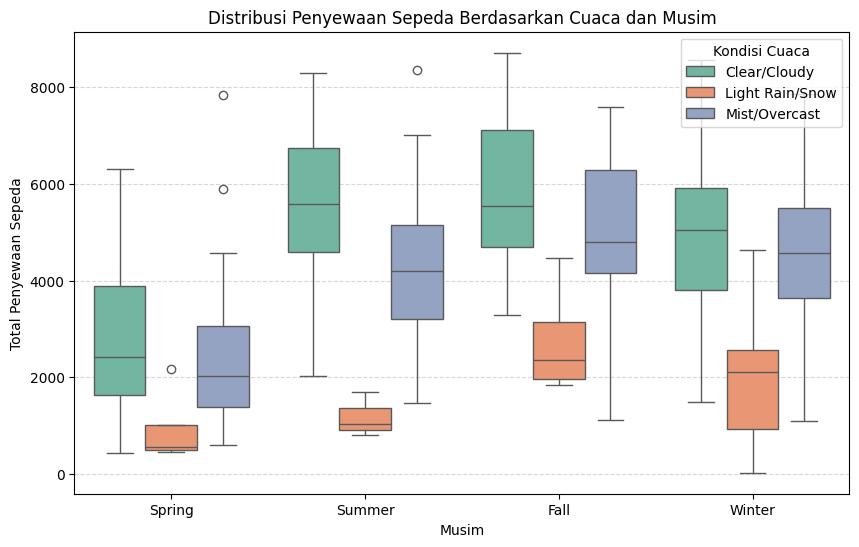

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="season", y="total_user", hue="weather", data=day_df, palette="Set2")

plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Cuaca dan Musim")
plt.legend(title="Kondisi Cuaca", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


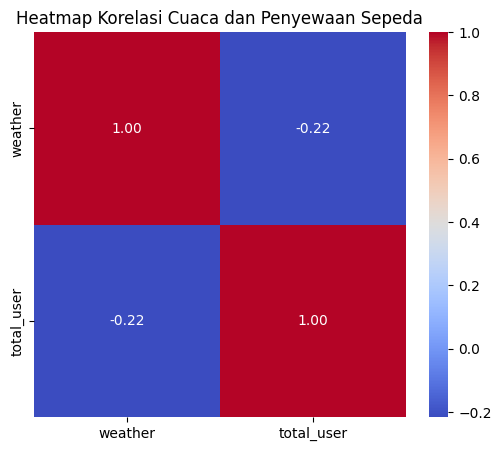

In [ ]:
weather_corr = day_df.copy()
weather_corr["weather"] = weather_corr["weather"].cat.codes  # Konversi kategori ke angka

plt.figure(figsize=(6, 5))
sns.heatmap(weather_corr[["weather", "total_user"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heatmap Korelasi Cuaca dan Penyewaan Sepeda")
plt.show()



- Cuaca cerah memiliki jumlah penyewaan tertinggi, karena kondisi ini paling nyaman untuk bersepeda.
- Korelasi negatif antara kondisi cuaca dan jumlah penyewaan sepeda menunjukkan bahwa semakin buruk cuaca, semakin rendah jumlah pengguna sepeda.
- Hujan ringan atau salju menyebabkan penurunan signifikan dalam jumlah penyewaan, menandakan bahwa pengguna lebih memilih moda transportasi lain saat cuaca buruk.

## Analisis Lanjutan (Opsional)

RFM Analysis


*   Recency(R) = Seberapa lama sejak terakhir kali pengguna menyewa sepeda
*   Frequency(F) = Seberapa sering penyewaan terjadi pada periode tertentu
*   Monetary(M) = Total jumlah penyewaan sepeda



In [31]:
def calculate_rfm(df):
    # Pastikan kolom tanggal dalam format datetime
    df["date"] = pd.to_datetime(df["date"])

    # Menentukan tanggal terakhir dalam dataset untuk menghitung recency
    recent_date = pd.Timestamp(df["date"].max())  # FIX: Gunakan Timestamp

    # Group by berdasarkan tanggal
    rfm_df = df.groupby("date", as_index=False).agg(
        frequency=("date", "count"),   # Seberapa sering penyewaan terjadi dalam dataset
        monetary=("total_user", "sum") # Total jumlah penyewaan sepeda per hari
    )

    # Hitung Recency (berapa hari sejak terakhir kali sepeda disewa)
    rfm_df["recency"] = (recent_date - rfm_df["date"]).dt.days  # FIX: Pastikan format sama-sama Timestamp

    return rfm_df
rfm_result = calculate_rfm(day_df)
print(rfm_result.head())

        date  frequency  monetary  recency
0 2011-01-01          1       985      730
1 2011-01-02          1       801      729
2 2011-01-03          1      1349      728
3 2011-01-04          1      1562      727
4 2011-01-05          1      1600      726


<ipython-input-33-82c3f9ab6bcc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="date", data=rfm_result.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-33-82c3f9ab6bcc>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="date", data=rfm_result.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-33-82c3f9ab6bcc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="date", data=rfm_result.sort_values(by="monetary"

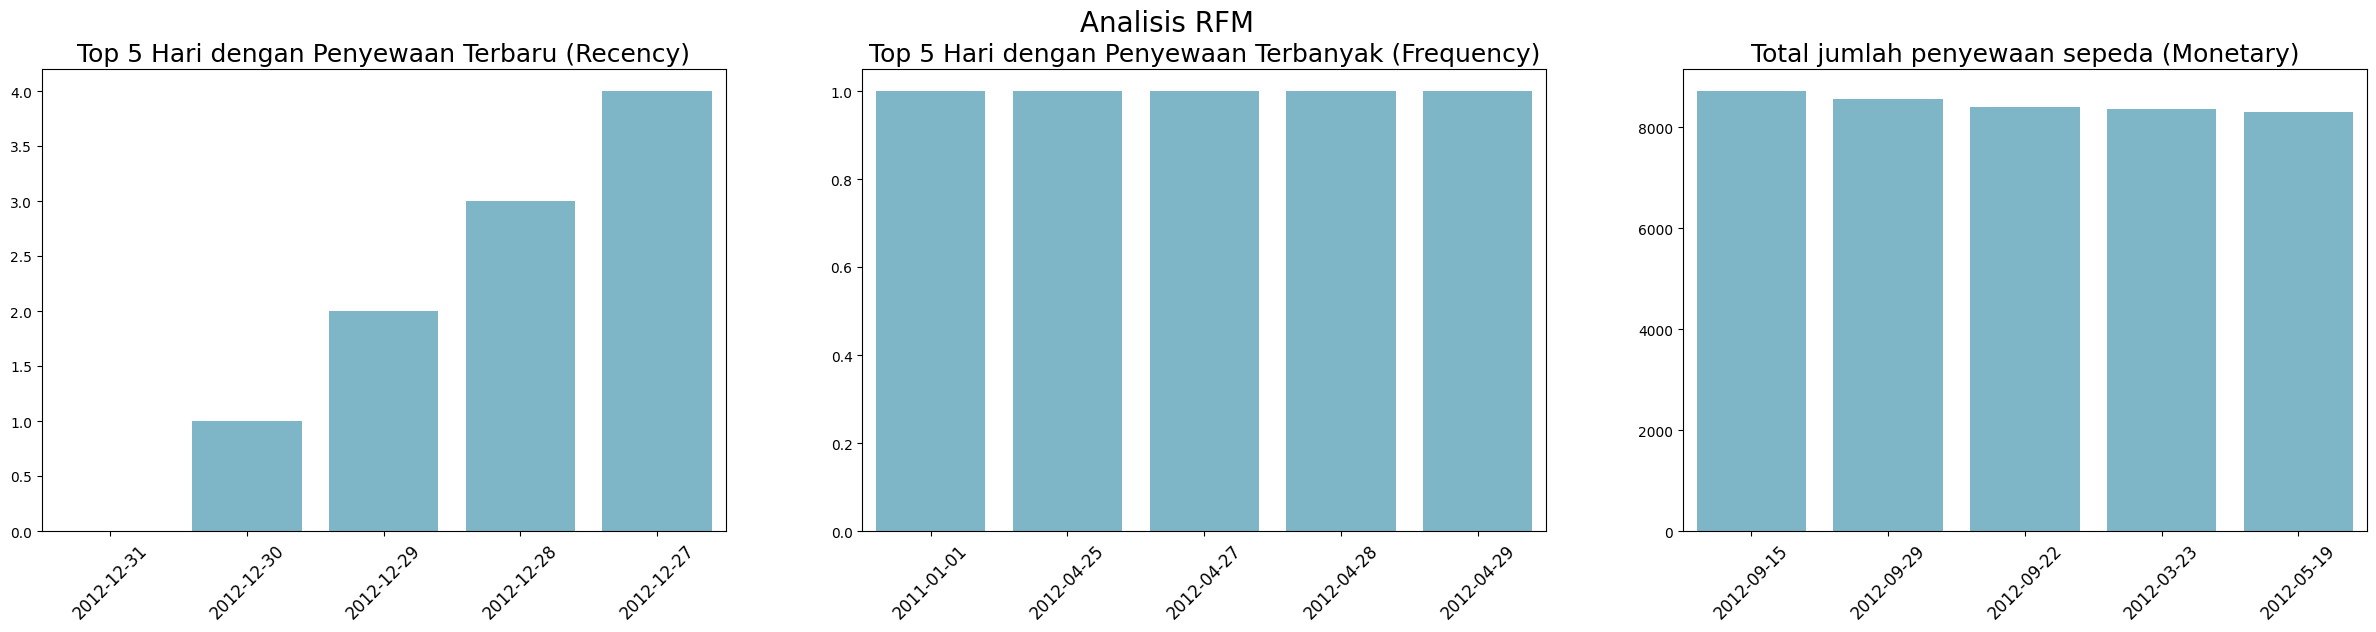

In [33]:
# Setup figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))


colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]


sns.barplot(y="recency", x="date", data=rfm_result.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Hari dengan Penyewaan Terbaru (Recency)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', rotation=45, labelsize=12)


sns.barplot(y="frequency", x="date", data=rfm_result.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Top 5 Hari dengan Penyewaan Terbanyak (Frequency)", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=45, labelsize=12)


sns.barplot(y="monetary", x="date", data=rfm_result.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Total jumlah penyewaan sepeda (Monetary)", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=45, labelsize=12)

# Set Super Title
plt.suptitle("Analisis RFM", fontsize=20)
plt.show()

## Conclusion

### Conclution Pertanyaan 1
Tren jumlah penyewaan sepeda menunjukkan bahwa Fall Season memiliki jumlah penyewaan tertinggi dibandingkan musim lainnya. Hal ini kemungkinan disebabkan oleh kondisi cuaca yang nyaman dan stabil untuk bersepeda. Sebaliknya, musim semi memiliki jumlah penyewaan terendah, mungkin karena curah hujan yang lebih tinggi atau suhu yang masih kurang ideal.

### Conclution Pertanyaan 2
Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda, dengan cuaca cerah atau berawan memiliki jumlah penyewaan tertinggi. Sebaliknya, kondisi hujan atau salju menyebabkan penurunan jumlah penyewaan, menunjukkan bahwa pengguna cenderung menghindari bersepeda saat cuaca buruk. Meskipun demikian, masih ada penyewaan sepeda dalam kondisi cuaca yang kurang ideal, menunjukkan adanya segmen pengguna yang tetap menggunakan sepeda untuk keperluan tertentu. Oleh karena itu, strategi bisnis dapat menyesuaikan jumlah sepeda yang tersedia berdasarkan prakiraan cuaca untuk meningkatkan efisiensi operasional.

### Conclution RFM Analysis
Penyewaan sepeda masih aktif hingga akhir tahun 2012, dengan puncak aktivitas pada bulan April dan September. Beberapa hari di awal tahun dan di akhir bulan april memiliki frequency penyewaan terbanyak. Total pendapatan penyewaan tertinggi terjadi pada bulan September dan Maret, kemungkinan karena cuaca yang mendukung(summer). Strategi pemasaran dapat difokuskan pada bulan-bulan tersebut dengan promo atau penambahan stok sepeda.

In [34]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.3.0.34.45
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.

### Mengambil data untuk dashboard streamlit

In [35]:
day_df.to_csv("clean_day_df.csv", index=False)

In [36]:
hours_df.to_csv("clean_hours_df.csv", index=False)